## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [2]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.8 MB/s eta 0:00:00


In [55]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [56]:
Xtrain = pd.read_csv("sample_data/TrainData.csv")
Xtest = pd.read_csv("sample_data/TestData.csv")

In [57]:
Xtrain

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,NaN,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1


In [58]:
Xtest

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,40,238.933333,220589,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2496,54,238.933333,165278,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2497,44,238.933333,398473,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,70,0.238933,1
2498,35,238.933333,183898,0.238933,11,0.238933,0.238933,0.238933,23.893333,0.238933,7298,0,50,0.238933,1


In [59]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [60]:
Xtrain.isnull().sum()

,0
f1,0
f2,75
f3,0
f4,0
f5,0
f6,0
f7,1875
f8,0
f9,0
f10,0


In [61]:
Xtrain.fillna(Xtrain.median(), inplace=True)

In [62]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      7500 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7500 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [63]:
Xtrain.duplicated().sum()

0

In [64]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


In [65]:
Xtest.duplicated().sum()

0

In [66]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,7500.0,38.579600,13.647719,17.000000,28.000000,37.000000,47.000000,9.000000e+01
f2,7500.0,238.702194,75.843216,64.259070,218.593930,218.593930,218.593930,5.753968e+02
f3,7500.0,190384.986800,105867.442524,19302.000000,118019.000000,179568.500000,239441.750000,1.226583e+06
f4,7500.0,0.238933,0.151738,0.000029,0.171817,0.179322,0.239316,7.293233e-01
f5,7500.0,10.083200,2.546071,1.000000,9.000000,10.000000,12.000000,1.600000e+01
f6,7500.0,0.238934,0.190283,0.049127,0.049127,0.098837,0.445026,4.450262e-01
f7,7500.0,0.240810,0.127625,0.000000,0.131370,0.241573,0.274531,4.822222e-01
f8,7500.0,0.238933,0.193365,0.009499,0.066581,0.103024,0.444334,4.843750e-01
f9,7500.0,23.893333,4.451530,5.970149,25.606721,25.606721,25.606721,2.560672e+01
f10,7500.0,0.238933,0.087708,0.113590,0.113590,0.300298,0.300298,3.002979e-01


In [67]:
Xtest.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,2500.0,38.069200,1.344217e+01,17.000000,27.000000,37.000000,47.000000,90.000000
f2,2500.0,238.933333,5.912898e-12,238.933333,238.933333,238.933333,238.933333,238.933333
f3,2500.0,191561.425200,1.075425e+05,19302.000000,119098.750000,177510.500000,238851.250000,910398.000000
f4,2500.0,0.238933,1.424146e-14,0.238933,0.238933,0.238933,0.238933,0.238933
f5,2500.0,10.056800,2.554875e+00,1.000000,9.000000,10.000000,12.000000,16.000000
f6,2500.0,0.238933,1.424146e-14,0.238933,0.238933,0.238933,0.238933,0.238933
f7,2500.0,0.238933,1.424146e-14,0.238933,0.238933,0.238933,0.238933,0.238933
f8,2500.0,0.238933,1.424146e-14,0.238933,0.238933,0.238933,0.238933,0.238933
f9,2500.0,23.893333,9.594246e-14,23.893333,23.893333,23.893333,23.893333,23.893333
f10,2500.0,0.238933,1.424146e-14,0.238933,0.238933,0.238933,0.238933,0.238933


### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

<Axes: xlabel='target'>

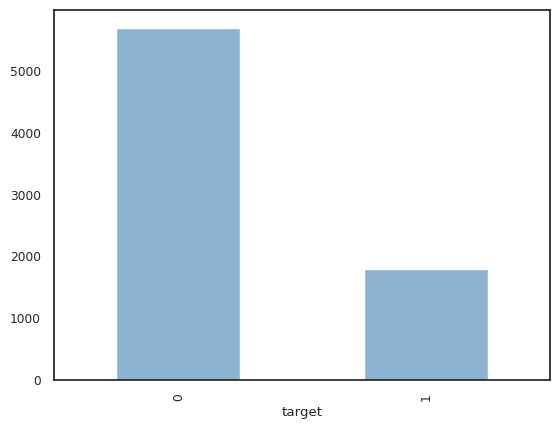

In [68]:
Xtrain.target.value_counts().plot(kind='bar')

<Axes: xlabel='target'>

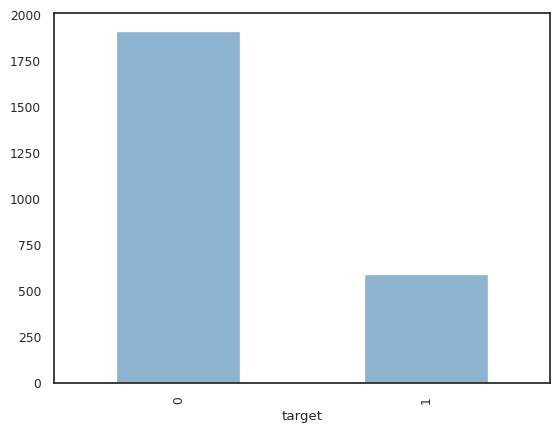

In [69]:
Xtest.target.value_counts().plot(kind='bar')

По обоим датасетам прослеживается явный дисбаланс!

Использование  accuracy (точности) в качестве метрики качества в задачах с дисбалансом классов может быть обманчивым и неэффективным. Вот основные причины, почему это так:
1. Проблема с интерпретацией

Точность рассчитывается как доля правильно классифицированных примеров среди всех примеров. В случае сильного дисбаланса классов модель может достичь высокой точности, просто предсказывая доминирующий класс. Например, если в выборке 95% объектов одного класса и 5% другого, модель, которая всегда предсказывает доминирующий класс, будет иметь точность 95%, но при этом не будет распознавать объекты меньшинства.

2. Игнорирование важности классов

В задачах, где классы имеют разную значимость (например, медицинская диагностика), высокая точность может скрывать серьёзные ошибки. Например, если модель не распознаёт редкие заболевания (меньшинство), это может привести к серьёзным последствиям для здоровья пациентов.

3. Альтернативные метрики

Вместо точности рекомендуется использовать другие показатели, которые лучше отражают качество модели при дисбалансе классов:

- Precision (точность): показывает долю правильно предсказанных положительных объектов среди всех предсказанных положительных;
- Recall (полнота): показывает долю правильно предсказанных положительных объектов среди всех реальных положительных;
- F-мера: гармоническое среднее precision и recall, что позволяет учитывать оба аспекта;
- ROC AUC: площадь под кривой ROC, которая показывает способность модели различать классы.

ИТОГ

В задачах с явным дисбалансом классов использование  accuracy в качестве метрики качества нецелесообразно. Вместо этого следует использовать более информативные метрики, которые учитывают специфику классов и могут дать более полное представление о производительности модели.

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [70]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
# Разделение данных на обучающие и тестовые
X = Xtrain.drop("target", axis=1)
y = Xtrain["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Обучение моделей LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
# Обучение моделей SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [74]:
# Предсказание на тестовых данных
y_pred_logreg = logreg.predict(X_test)
y_pred_svc = svc.predict(X_test)

In [75]:
# Оценка точности
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f"Точность LogisticRegression: {accuracy_logreg}")
print(f"Точность SVC: {accuracy_svc}")

Точность LogisticRegression: 0.8046666666666666
Точность SVC: 0.782


### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [76]:
# Создаем модель с взвешиванием классов для LogisticRegression
model_lg = LogisticRegression(class_weight='balanced', random_state=42)

In [77]:
# Обучаем модель
model_lg.fit(X_train, y_train)

# Делаем предсказания
y_pred_log = model_lg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)

Accuracy: 0.662


In [79]:
# Создаем модель с взвешиванием классов для SVC
model_svc = SVC(class_weight='balanced', random_state=42)

In [81]:
# Обучаем модель
model_svc.fit(X_train, y_train)

# Делаем предсказания
y_pred_model_svc = model_svc.predict(X_test)

In [82]:
# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred_model_svc)
print("Accuracy:", accuracy)

Accuracy: 0.7926666666666666


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

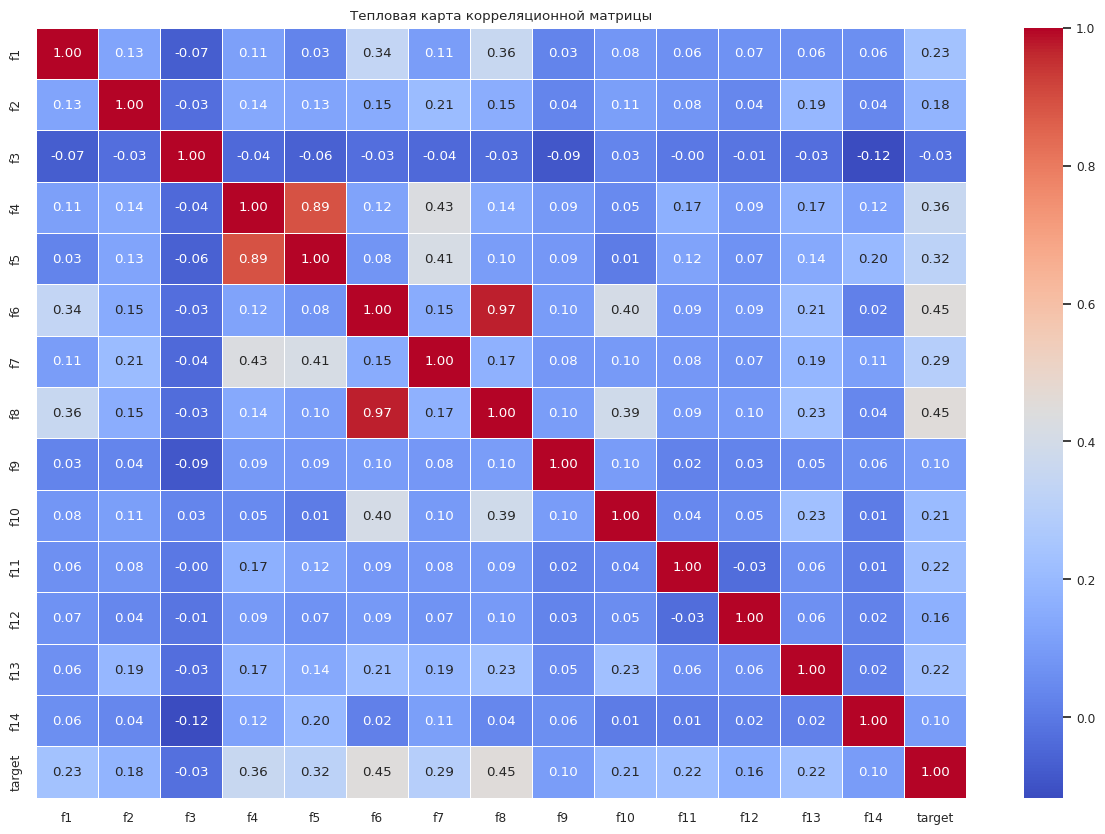

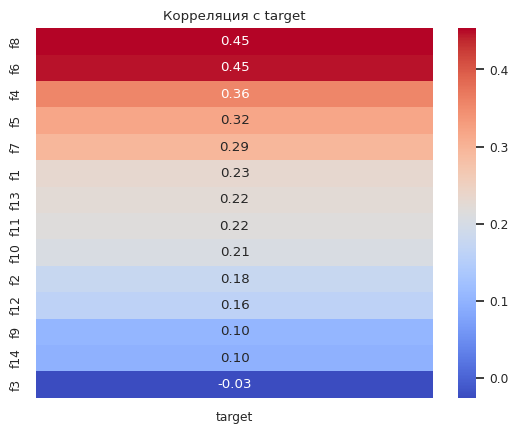

In [84]:
# Вычисляем корреляционную матрицу для обработанного DataFrame
correlation_matrix = Xtrain.corr()

# Настраиваем размеры тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

# Вычисляем корреляцию между всеми переменными и сохраняем в переменной corr
corr = Xtrain.corr()
target_corr = corr['target'].drop('target')

# Сортируем корреляции по убыванию
target_corr_sorted = target_corr.sort_values(ascending=False)

# Настраиваем параметры визуализации для тепловой карты
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с target')
plt.show()

In [85]:
from sklearn.feature_selection import VarianceThreshold

In [103]:
# Удаление признаков с низкой дисперсией
selector = VarianceThreshold(threshold=0.035)  # Порог можно настроить
train_data_reduced = selector.fit_transform(Xtrain)

# Получение оставшихся признаков
remaining_features = Xtrain.columns[selector.get_support()]
train_data_reduced = pd.DataFrame(train_data_reduced, columns=remaining_features)

In [104]:
# Удаление коррелирующих признаков
correlation_matrix = Xtrain.corr()
# Установка порога корреляции
threshold = 0.8

# Найти пары высококоррелирующих признаков
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

# Удаление высококоррелирующих признаков из обучающего набора
train_data_reduced.drop(columns=to_drop, inplace=True)

In [105]:
# Сохранение очищенных данных
train_data_reduced.to_csv('TrainData_Cleaned.csv', index=False)

In [124]:
# Загрузка очищенного датасета
data = pd.read_csv('TrainData_Cleaned.csv')
data

,f1,f2,f3,f6,f9,f11,f12,f13,target
0,50.0,218.593930,273536.0,0.445026,5.970149,0.0,0.0,49.0,0.0
1,32.0,276.771005,173314.0,0.445026,5.970149,0.0,0.0,60.0,0.0
2,38.0,218.593930,28887.0,0.445026,25.606721,0.0,0.0,50.0,0.0
3,19.0,218.593930,427862.0,0.049127,25.606721,0.0,0.0,35.0,0.0
4,44.0,218.593930,109339.0,0.098837,5.970149,0.0,0.0,46.0,0.0
...,...,...,...,...,...,...,...,...,...
7495,48.0,218.593930,329778.0,0.066372,25.606721,0.0,0.0,40.0,0.0
7496,25.0,218.593930,104439.0,0.049127,25.606721,0.0,0.0,50.0,0.0
7497,50.0,218.593930,162632.0,0.445026,25.606721,0.0,0.0,45.0,0.0
7498,51.0,276.771005,174824.0,0.049127,25.606721,8614.0,0.0,40.0,1.0


In [125]:
# Разделение на признаки и целевую переменную
X = data.drop('target', axis=1)
y = data['target']

In [126]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [130]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
# Оптимизация гиперпараметров с помощью Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [132]:
# Оценка модели на тестовых данных
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1158
         1.0       0.79      0.45      0.57       342

    accuracy                           0.85      1500
   macro avg       0.82      0.71      0.74      1500
weighted avg       0.84      0.85      0.83      1500



In [133]:
# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8466666666666667


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [134]:
y_pred = best_model.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.5725


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [145]:
min_length = min(len(y_pred_logreg), len(y_pred))
Y_pred_logreg = y_pred_logreg[:min_length]
Y_pred_best = y_pred[:min_length]
Y = y[:min_length]
#pred_final = (alpha * Y_pred_rf + (1 - alpha) * Y_pred_gb).astype(int)

In [141]:
from sklearn.metrics import f1_score

In [146]:
for i in range(0, 101):
    alpha = i / 100
    pred_final = (alpha * Y_pred_logreg + (1 - alpha) * Y_pred_best).astype(int)
    true_alpha = 0
    f1 = 0
    if f1_score(Y, pred_final) > f1:
      true_alpha = alpha
      f1 = f1_score(Y, pred_final)
print(f'{f1=}, {true_alpha=}')

f1=0.11814345991561181, true_alpha=1.0


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?


**ВЫВОДЫ**

В работе использовались следующие модели: Логистическая регрессия, Логистическая регрессия с взвешиванием классов, Метод опорных векторов, Метод опорных векторов с взвешиванием классов и Случайный лес с удалением признаков с низкой десперсией и коррелирующих признаков и с оптимизацией параметров.

На тестовых данных лучшее качество показали модели Логистической регрессии (аccuracy: 0.805) и случайного леса (аccuracy: 0.847).

Если говорить в общем, то при смешивании моделей метрика f1 ухудшилась.

**Если детально проанализировать метрики наилучшей модели Случайного леса, то можно сделать следубщие выводы.**

***Основные метрики***

1. Precision (Точность)
- 0.0: 0.86
- 1.0: 0.79

Precision показывает, насколько точно модель предсказывает положительный класс (1.0).

Для класса 0.0 точность составляет 86%, что означает, что из всех объектов, предсказанных как класс 0, 86% действительно принадлежат этому классу.

Для класса 1.0 точность составляет 79%, что означает, что из всех объектов, предсказанных как класс 1, 79% действительно принадлежат этому классу.

2. Recall (Полнота)
- 0.0: 0.96
- 1.0: 0.45

Recall показывает, насколько хорошо модель находит все положительные примеры.

Для класса 0.0 полнота составляет 96%, что означает, что модель правильно идентифицировала 96% реальных объектов этого класса.

Для класса 1.0 полнота составляет только 45%, что указывает на то, что модель не смогла найти большинство объектов этого класса.

3. F1-score
- 0.0: 0.91
- 1.0: 0.57

F1-score — это гармоническое среднее между precision и recall, которое учитывает оба аспекта.

Для класса 0.0 F1-score равен 0.91, что является отличным значением.

Для класса 1.0 F1-score равен 0.57, что указывает на необходимость улучшения модели для этого класса.

***Общие метрики***

1. Accuracy (Точность): Accuracy составляет 85%, что говорит о том, что модель правильно классифицировала 85% всех объектов в тестовом наборе.

2. Macro Average
- Precision: 0.82
- Recall: 0.71
- F1-score: 0.74

Macro average рассчитывается как простое среднее для каждой метрики по классам и не учитывает количество образцов в каждом классе.

3. Weighted Average
- Precision: 0.84
- Recall: 0.85
- F1-score: 0.83

Weighted average учитывает количество образцов в каждом классе и дает более сбалансированное представление о производительности модели.

ИТОГ

Модель показывает хорошую точность и полноту для класса 0. Однако для класса 1 (положительный класс) полнота и F1-score значительно ниже.
Это может указывать на дисбаланс классов или на то, что модель не может правильно классифицировать объекты этого класса.

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.

Еще один вариант смешивания моделей на очищенном датасете 'TrainData_Cleaned.csv'

In [151]:
# Разделение на признаки и целевую переменную
X = data.drop('target', axis=1)
y = data['target']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение моделей
model1 = LogisticRegression(max_iter=10000, random_state=42)
model2 = RandomForestClassifier(n_estimators=5000, random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Получение предсказаний на тестовом наборе
pred1 = model1.predict_proba(X_test)[:, 1]  # Вероятности положительного класса для логистической регрессии
pred2 = model2.predict_proba(X_test)[:, 1]  # Вероятности положительного класса для случайного леса

# Подбор α
best_f1 = 0
best_alpha = 0

for alpha in np.arange(0, 1.01, 0.01):  # α от 0 до 1 с шагом 0.01
    pred_final = alpha * pred1 + (1 - alpha) * pred2
    pred_final_binary = (pred_final >= 0.5).astype(int)  # Преобразование вероятностей в классы

    # Оценка качества с помощью F1 Score
    f1 = f1_score(y_test, pred_final_binary)

    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha

print(f'Лучшее значение α: {best_alpha:.2f}')
print(f'Лучший F1 Score: {best_f1:.4f}')

Лучшее значение α: 0.00
Лучший F1 Score: 0.5674
